In [4]:
import pandas as pd
base = pd.read_csv('census.csv')
base.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
base['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [6]:
def converte_classe(rotulo):
    if rotulo == ' >50K':
        return 1
    else:
        return 0

In [7]:
base['income'] = base['income'].apply(converte_classe)

In [8]:
base['income'].unique()

array([0, 1], dtype=int64)

In [9]:
x = base.drop('income', axis = 1) # x recebe tudo, menos a coluna income que é o y... axis = 1 é pra pegar por colunas

In [10]:
y = base['income']

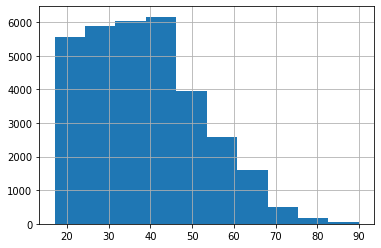

In [11]:
base.age.hist() # a ideia é criar categorias com base nas faixas de idades

In [12]:
import tensorflow as tf

C:\Users\Douglas\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Douglas\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Douglas\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Douglas\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarnin

In [13]:
idade = tf.feature_column.numeric_column('age')

In [14]:
idade_categorica = [tf.feature_column.bucketized_column(idade, boundaries=[20,30,40,50,60,70,80,90])]

In [15]:
print(idade_categorica)

[BucketizedColumn(source_column=NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(20, 30, 40, 50, 60, 70, 80, 90))]


In [16]:
x.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country'],
      dtype='object')

In [17]:
nome_colunas_categoricas = ['workclass','education','marital-status', 'occupation', 'relationship', 
                            'race', 'sex','native-country']

In [18]:
x['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [19]:
x['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [20]:
# forma automatica de criar categorias, assim nao precisa preencher uma a uma: "M", "F"... "State-gov", "Private"
colunas_categoricas = [tf.feature_column.categorical_column_with_vocabulary_list(
    key = c, vocabulary_list = x[c].unique()) for c in nome_colunas_categoricas]

In [21]:
print(colunas_categoricas[0])

VocabularyListCategoricalColumn(key='workclass', vocabulary_list=(' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov', ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay', ' Never-worked'), dtype=tf.string, default_value=-1, num_oov_buckets=0)


In [22]:
print(colunas_categoricas[1])

VocabularyListCategoricalColumn(key='education', vocabulary_list=(' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th', ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th', ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'), dtype=tf.string, default_value=-1, num_oov_buckets=0)


In [23]:
nome_colunas_numericas = ['final-weight','education-num', 'capital-gain', 'capital-loos', 'hour-per-week']

In [24]:
colunas_numericas = [tf.feature_column.numeric_column(key = c) for c in nome_colunas_numericas]

In [25]:
colunas = idade_categorica + colunas_categoricas + colunas_numericas

In [26]:
from sklearn.model_selection import train_test_split
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size = 0.3)

In [27]:
funcao_treinamento = tf.estimator.inputs.pandas_input_fn(x = x_treinamento, y = y_treinamento, batch_size = 32, 
                                                         num_epochs = None, shuffle = True)

In [28]:
classificador = tf.estimator.LinearClassifier(feature_columns = colunas)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Douglas\\AppData\\Local\\Temp\\tmp2zyzhmjr', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000025799897B48>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [29]:
classificador.train(input_fn = funcao_treinamento, steps = 10000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Douglas\AppData\Local\Temp\tmp2zyzhmjr\model.ckpt.
INFO:tensorflow:loss = 22.18071, step = 1
INFO:tensorflow:global_step/sec: 151.733
INFO:tensorflow:loss = 14505.1

INFO:tensorflow:global_step/sec: 354.581
INFO:tensorflow:loss = 881.6271, step = 3601 (0.281 sec)
INFO:tensorflow:global_step/sec: 352.084
INFO:tensorflow:loss = 2389.2861, step = 3701 (0.284 sec)
INFO:tensorflow:global_step/sec: 342.439
INFO:tensorflow:loss = 2961.8872, step = 3801 (0.293 sec)
INFO:tensorflow:global_step/sec: 362.29
INFO:tensorflow:loss = 1431.3672, step = 3901 (0.276 sec)
INFO:tensorflow:global_step/sec: 357.113
INFO:tensorflow:loss = 1113.7186, step = 4001 (0.280 sec)
INFO:tensorflow:global_step/sec: 340.109
INFO:tensorflow:loss = 726.73834, step = 4101 (0.295 sec)
INFO:tensorflow:global_step/sec: 285.692
INFO:tensorflow:loss = 1405.771, step = 4201 (0.350 sec)
INFO:tensorflow:global_step/sec: 357.114
INFO:tensorflow:loss = 8733.436, step = 4301 (0.279 sec)
INFO:tensorflow:global_step/sec: 289.829
INFO:tensorflow:loss = 8092.799, step = 4401 (0.345 sec)
INFO:tensorflow:global_step/sec: 252.506
INFO:tensorflow:loss = 369.26285, step = 4501 (0.398 sec)
INFO:tensorflow

In [30]:
funcao_previsao = tf.estimator.inputs.pandas_input_fn(x = x_teste, batch_size = 32, shuffle = False)

In [31]:
previsoes = classificador.predict(input_fn = funcao_previsao)

In [32]:
list(previsoes)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\Douglas\AppData\Local\Temp\tmp2zyzhmjr\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([101.87957], dtype=float32),
  'logistic': array([1.], dtype=float32),
  'probabilities': array([0., 1.], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([83.31444], dtype=float32),
  'logistic': array([1.], dtype=float32),
  'probabilities': array([6.561443e-37, 1.000000e+00], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([113.138954], dtype=float32),
  'logistic': array([1.], dtype=float32),
  'probabilities': array([0., 1.], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([1240.0397], dtype=float32),
  'log

In [33]:
previsoes_final = []
for p in classificador.predict(input_fn = funcao_previsao):
    previsoes_final.append(p['class_ids'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Douglas\AppData\Local\Temp\tmp2zyzhmjr\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [34]:
previsoes_final

[array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], 

In [40]:
from sklearn.metrics import accuracy_score
taxa_acerto = accuracy_score(y_teste, previsoes_final)
taxa_acerto

0.29153444569556763

In [39]:
y_teste.head()

5089     0
19995    1
14299    1
6595     1
10572    0
Name: income, dtype: int64